In [ ]:
# Library data manipulation
import pandas as pd
import numpy as np

# Library untuk pembuatan model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk mengukur akurasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import Data

In [ ]:
df = pd.read_csv("/content/bab6_adult_data.csv",skipinitialspace=True, header=0)

In [ ]:
df

,age,workclass,fnlwft,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Data Pre-processing

Mengecek missing value

In [ ]:
print(df.isna().sum())

age               0
workclass         0
fnlwft            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours-per-week    0
native_country    0
income            0
dtype: int64


terlihat bahwa tiap variabel tidak memiliki missing value,

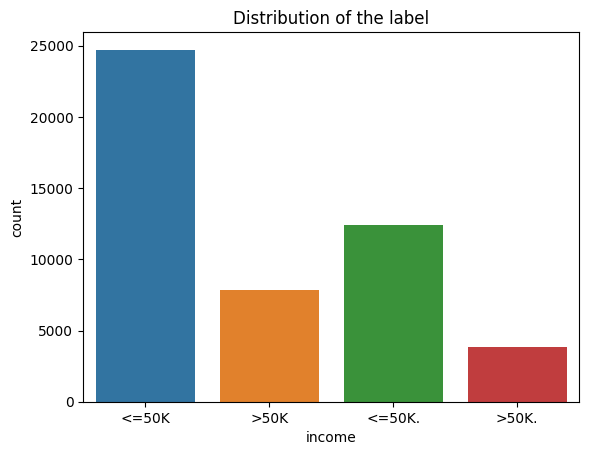

In [ ]:
# Check the distribution of the label
sns.countplot(x=df['income'], data=df)
plt.title("Distribution of the label")
plt.show()

Terlihat bahwa terdapat 4 kategorik, dimana terjadi pengulangan <=50K dengan <=50K. dan >50K dengan >50K. untuk itu variabel income yang memiliki titik(.) akan direplace sehingga akan menyatu dengan yang asli tanpa titik

In [ ]:
df['income'] = df['income'].replace('<=50K.', '<=50K')
df['income'] = df['income'].replace('>50K.', '>50K')

Cek kembali distribusi variabel respon

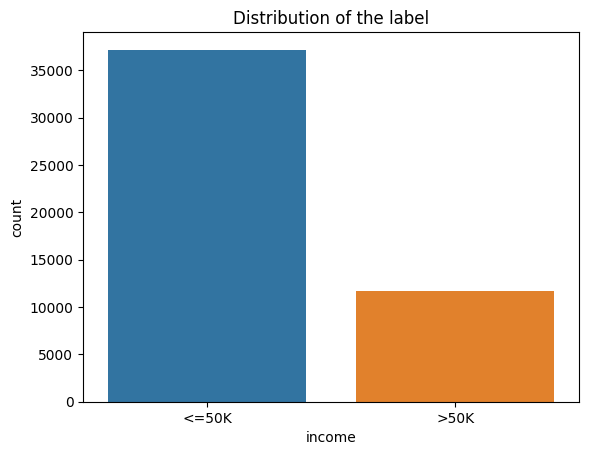

In [ ]:
# Check the distribution of the label
sns.countplot(x=df['income'], data=df)
plt.title("Distribution of the label")
plt.show()

Terlihat bahwa sudah selesai, variabel income dengan titik bergabung dengan yang tanpa titik

Drop variabel education_num karena mirip seperti variabel education

In [ ]:
df = df.drop('education_num', axis=1)

# Exploratory Data Analysis

Mengubah kategori pada label respon menjadi numerik

In [ ]:
df['income'] = df['income'].replace('<=50K', '1')
df['income'] = df['income'].replace('>50K', '2')
df

,age,workclass,fnlwft,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,1
48838,64,?,321403,HS-grad,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,1
48839,38,Private,374983,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,1
48840,44,Private,83891,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,1


In [ ]:
df["income"] = df["income"].astype(int)

Melihat variabel-variabel kategorik

In [ ]:
# Define categorical columns
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

In [ ]:
categorical_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

Melihat unique dari tiap variabel kategorik

In [ ]:
for col in categorical_cols:
  print(df[col].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' '

Ternyata masih ada missing value dari variabel workclass, occupation, dan native_country. Untuk missing value tersebut akan diisi dengan nilai modus variabel tersebut untuk masing-masing nilai data 'label'

In [ ]:
#untuk income <=50K
df_filtered1 = df[df['income'] == 1]
#untuk income >50K
df_filtered2 = df[df['income'] == 2]

In [ ]:
#modus variabel workclass
a = df_filtered1['workclass'].mode()[0]
b = df_filtered2['workclass'].mode()[0]

#modus variabel occupation
c = df_filtered1['occupation'].mode()[0]
d = df_filtered2['occupation'].mode()[0]

#modus variabel native_country
e = df_filtered1['native_country'].mode()[0]
f = df_filtered2['native_country'].mode()[0]

print(a,b,c,d,e,f)

Private Private Adm-clerical Exec-managerial United-States United-States


Mengubah tiap data yang berisi '?' dengan 'NULL' untuk diisi missing value

In [ ]:
df.replace('?', np.nan, inplace=True)

Mengisi missing value berdasarkan modus variabel tersebut dari tiap label

In [ ]:
df.loc[(df['workclass'].isna()) & (df['income'] == 1), 'workclass'] = 'Private'
df.loc[(df['workclass'].isna()) & (df['income'] == 2), 'workclass'] = 'Private'
df.loc[(df['occupation'].isna()) & (df['income'] == 1), 'occupation'] = 'Adm-clerical'
df.loc[(df['occupation'].isna()) & (df['income'] == 2), 'occupation'] = 'Exec-managerial'
df.loc[(df['native_country'].isna()) & (df['income'] == 1), 'native_country'] = 'United-States'
df.loc[(df['native_country'].isna()) & (df['income'] == 2), 'native_country'] = 'United-States'

Cek missing value lagi

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwft            0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours-per-week    0
native_country    0
income            0
dtype: int64

Sudah tidak ada missing value yey

Melihat variabel numerik

In [ ]:
# Define numerical columns
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64'] and cname != 'income']
# Checking the numerical columns
numerical_cols

['age', 'fnlwft', 'capital_gain', 'capital_loss', 'hours-per-week']

Membuat dummy variable, yakni mengubah variabel kategorik menjadi numerik dengan OHE

In [ ]:
# One hot encoding for categorical columns
OR_encoder = OneHotEncoder()
# Fit and transform the categorical columns
df_cat_encoded = OR_encoder.fit_transform(df[categorical_cols])
# Assign to dfframe
df_cat_encoded = pd.DataFrame(df_cat_encoded.toarray(), columns=OR_encoder.get_feature_names_out(categorical_cols))

In [ ]:
# Joining the numerical and categorical dfframes
df_encoded = pd.concat([df[numerical_cols], df_cat_encoded], axis=1)

# Check the result
df_encoded.head()

,age,fnlwft,capital_gain,capital_loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,2174,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,0,0,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Melakukan standardisasi kepada data numerik

In [ ]:
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler
scaler = StandardScaler()

# Mengambil semua kolom numerik
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Melakukan scaling pada kolom numerik
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Joining the numerical and categorical dfframes
df_encoded = pd.concat([df[numerical_cols], df_cat_encoded,df['income']], axis=1)

# Check the result
df_encoded.head()

,age,fnlwft,capital_gain,capital_loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income
0,39,77516,2174,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,50,83311,0,0,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,38,215646,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,53,234721,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,28,338409,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Splitting Data

In [ ]:
y = df.income
X = df_encoded.drop(['income'], axis=1)

In [ ]:
df_encoded

,age,fnlwft,capital_gain,capital_loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income
0,39,77516,2174,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,50,83311,0,0,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,38,215646,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,53,234721,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,28,338409,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,0,0,36,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
48838,64,321403,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
48839,38,374983,0,0,50,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
48840,44,83891,5455,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


Melakukan SMOTE (Synthetic Minority Over-sampling Technique) pada data train sebab terjadi ketidakseimbangan jumlah label pada variabel respon, yakni label <=50K jauh lebih banyak daripada >50K

In [ ]:
from imblearn.over_sampling import SMOTE
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = (train_test_split(X,y,test_size=0.3, stratify=y, random_state=50))

# Balancing the training data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
X_train, X_test, y_train, y_test = (train_test_split(X,y,test_size=0.3, stratify=y, random_state=50))

Modelling dengan parameter terbaik berdasarkan GridsearchCV

In [ ]:
rf1 = RandomForestClassifier(n_estimators=200, max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=10)

model = rf1.fit(X_train, y_train)


In [ ]:
# Predict the test set
Y_pred = rf1.predict(X_test)

# Check the classification report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.89      0.95      0.91     11147
           2       0.78      0.61      0.68      3506

    accuracy                           0.87     14653
   macro avg       0.83      0.78      0.80     14653
weighted avg       0.86      0.87      0.86     14653



Modelling dengan parameter terbaik berdasarkan RandomizedSearchCV

In [ ]:
rf2 = RandomForestClassifier(n_estimators=190, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=15,max_depth=20,bootstrap=True)

model = rf2.fit(X_train, y_train)


In [ ]:
# Predict the test set
Y_pred = rf2.predict(X_test)

# Check the classification report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.88      0.95      0.92     11147
           2       0.79      0.60      0.68      3506

    accuracy                           0.87     14653
   macro avg       0.84      0.77      0.80     14653
weighted avg       0.86      0.87      0.86     14653



Modelling dengan parameter terbaik berdasarkan Bayesian Optimization

In [ ]:
rf3 = RandomForestClassifier(n_estimators=1000, max_features='sqrt', min_samples_leaf=1, min_samples_split=10,max_depth=10)

model = rf3.fit(X_train, y_train)

In [ ]:
# Predict the test set
Y_pred = rf3.predict(X_test)

# Check the classification report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.87      0.96      0.91     11147
           2       0.81      0.55      0.65      3506

    accuracy                           0.86     14653
   macro avg       0.84      0.75      0.78     14653
weighted avg       0.86      0.86      0.85     14653



Intepretasi :
Berdasarkan hasil hyperparameter tunning dengan metode GridSearchCV dan RandomizedSearchCV di atas, terlihat bahwa terjadi peningkatan nilai F1-Score berdasarkan macro avg sebesar 1%, Hal ini menunjukkan model menjadi semakin baik (improvement model). Sedangkan dengan menggunakan metode Bayesian Optimization malah terjadi penurunan F1-Score.

Feature Importance

Berdasarkan metode GridSearchCV

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf1.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
feature_importance

,feature,importance
0,capital_gain,1.503541e-01
1,marital_status_Married-civ-spouse,1.098687e-01
2,age,8.687386e-02
3,relationship_Husband,7.920134e-02
4,hours-per-week,5.975225e-02
...,...,...
99,native_country_Thailand,5.744562e-06
100,native_country_Honduras,4.661458e-06
101,native_country_Outlying-US(Guam-USVI-etc),3.667558e-06
102,workclass_Never-worked,2.777862e-08


Berdasarkan metode RandomizedSearchCV

In [ ]:
# Feature importance
feature_importance2 = pd.DataFrame({'feature': X_train.columns, 'importance': rf2.feature_importances_})
feature_importance2 = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
feature_importance2

,feature,importance
0,capital_gain,1.503541e-01
1,marital_status_Married-civ-spouse,1.098687e-01
2,age,8.687386e-02
3,relationship_Husband,7.920134e-02
4,hours-per-week,5.975225e-02
...,...,...
99,native_country_Thailand,5.744562e-06
100,native_country_Honduras,4.661458e-06
101,native_country_Outlying-US(Guam-USVI-etc),3.667558e-06
102,workclass_Never-worked,2.777862e-08
